In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import ticker

# Read in data

In [14]:
figure_folder = Path('../../../SupplementalFigures')
data_folder = Path('../../../Data/this_project/1_e_coli_batch_cultures')
reactor_folder = data_folder / 'batch_cultures_bioreactor_data' 

dasgip_dict = {}
MS_dict = {}
for fn in reactor_folder.glob('*.csv'):
    key = fn.stem.split('_')[0]
    data_type = fn.stem.split('_')[1]
    if data_type == 'dasgip':
        dasgip_dict[key] = pd.read_csv(fn)
    elif data_type == 'MS':
        MS_dict[key] = pd.read_csv(fn)
    else:
        raise ValueError(f"Unknown data type in filename: {fn.stem}")


# Read OD data
od_fn = data_folder / '1H_OD_and_gDW.csv'
df_od = pd.read_csv(od_fn, index_col=0)

In [17]:
M_to_rel = {
    'M1': 'REL01',
    'M3': 'REL02', 
    'M4': 'REL03', 
    'M5': 'REL04', 
    'M6': 'REL05', 
    'M7': 'REL06', 
    'M9': 'REL07', 
    'M10': 'REL08',
    'M11': 'REL09',
}
rel_to_M = {v: k for k, v in M_to_rel.items()}

In [74]:
MS_df

,Time&Date,N2,O2,CO2,CER,OUR,RQ,Timestamp,Hours,Bioreactor,CarbonSource
0,2023/09/13 09:23:55.09,78.1379,20.9272,0.0000,-0.018000,0.0925,-0.1943,2023-09-13 09:23:55.090,0.041414,M11,L-Alanine
1,2023/09/13 09:28:25.19,78.1520,20.9132,0.0000,-0.017700,0.1091,-0.1620,2023-09-13 09:28:25.190,0.116442,M11,L-Alanine
2,2023/09/13 09:33:02.15,78.1580,20.9042,0.0036,-0.013900,0.1249,-0.1114,2023-09-13 09:33:02.150,0.193375,M11,L-Alanine
3,2023/09/13 09:37:31.63,78.1459,20.9112,0.0078,-0.009658,0.1092,-0.0885,2023-09-13 09:37:31.630,0.268231,M11,L-Alanine
4,2023/09/13 09:42:02.57,78.1495,20.9048,0.0112,-0.007165,0.1356,-0.0528,2023-09-13 09:42:02.570,0.343492,M11,L-Alanine
...,...,...,...,...,...,...,...,...,...,...,...
365,2023/09/14 12:48:47.39,78.1272,20.9333,0.0037,-0.016700,0.1055,-0.1578,2023-09-14 12:48:47.390,27.455942,M11,L-Alanine
366,2023/09/14 12:53:24.92,78.1279,20.9322,0.0030,-0.016300,0.1054,-0.1547,2023-09-14 12:53:24.920,27.533033,M11,L-Alanine
367,2023/09/14 12:57:55.14,78.1245,20.9362,0.0028,-0.015500,0.0926,-0.1677,2023-09-14 12:57:55.140,27.608094,M11,L-Alanine
368,2023/09/14 13:02:24.92,78.1298,20.9314,0.0031,-0.014900,0.1007,-0.1484,2023-09-14 13:02:24.920,27.683033,M11,L-Alanine


Index(['DO [%]', 'FA [mL/h]', 'FB [mL/h]', 'N [rpm]', 'pH', 'Hours',
       'Bioreactor', 'CarbonSource'],
      dtype='object')
Index(['DO [%]', 'FA [mL/h]', 'FB [mL/h]', 'N [rpm]', 'pH', 'Hours',
       'Bioreactor', 'CarbonSource'],
      dtype='object')
Index(['DO [%]', 'FA [mL/h]', 'FB [mL/h]', 'N [rpm]', 'pH', 'Hours',
       'Bioreactor', 'CarbonSource'],
      dtype='object')
Index(['DO [%]', 'FA [mL/h]', 'FB [mL/h]', 'N [rpm]', 'pH', 'Hours',
       'Bioreactor', 'CarbonSource'],
      dtype='object')
Index(['DO [%]', 'FA [mL/h]', 'FB [mL/h]', 'N [rpm]', 'pH', 'Hours',
       'Bioreactor', 'CarbonSource'],
      dtype='object')
Index(['DO [%]', 'FA [mL/h]', 'FB [mL/h]', 'N [rpm]', 'pH', 'Hours',
       'Bioreactor', 'CarbonSource'],
      dtype='object')
Index(['DO [%]', 'FA [mL/h]', 'FB [mL/h]', 'N [rpm]', 'pH', 'Hours',
       'Bioreactor', 'CarbonSource'],
      dtype='object')
Index(['DO [%]', 'FA [mL/h]', 'FB [mL/h]', 'N [rpm]', 'pH', 'Hours',
       'Bioreactor', 'Carbon

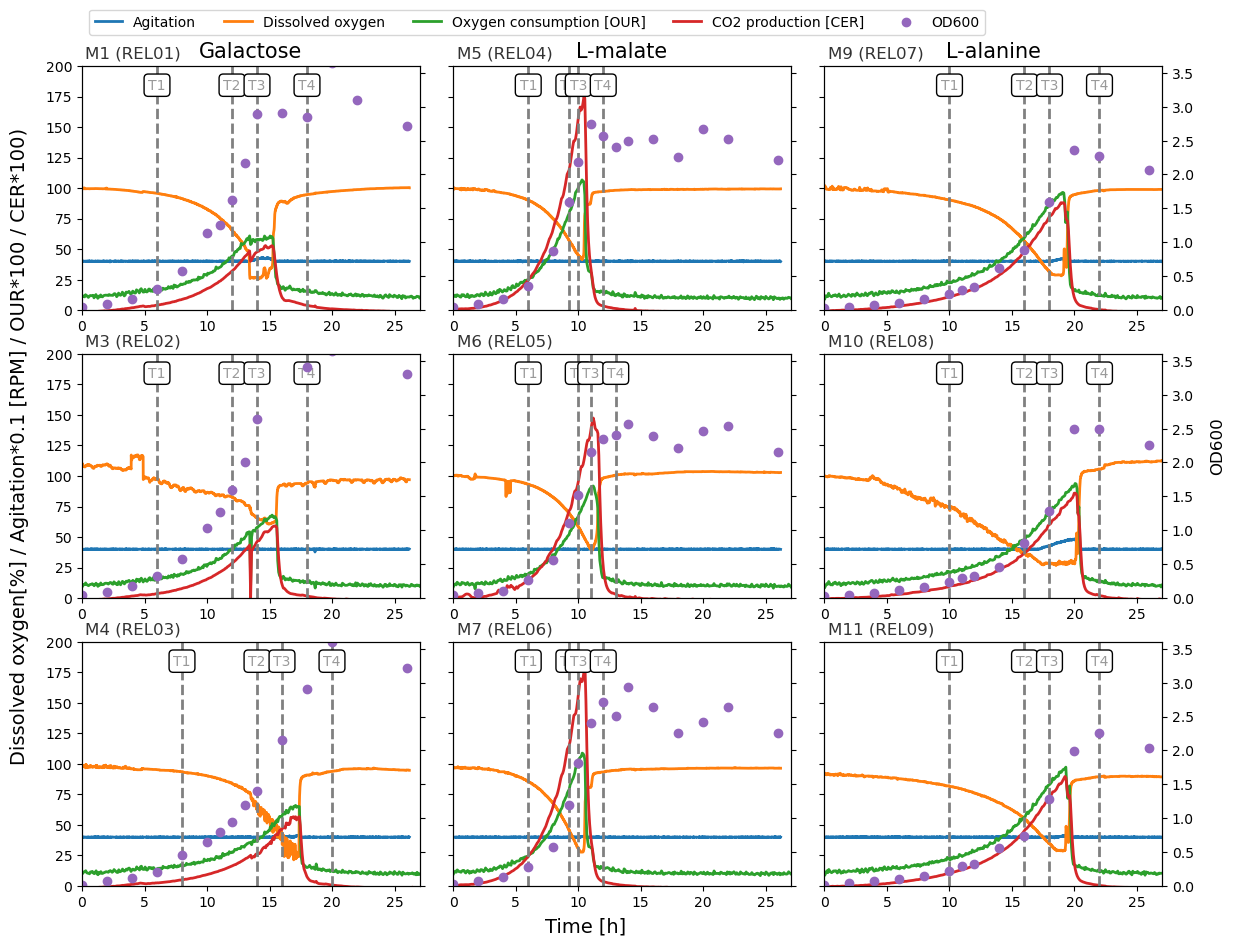

In [135]:
loc = ticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
fig, axes = plt.subplots(3,3, figsize =(12,10), sharey = True)
# fig.suptitle('Galactose', fontsize = 20)
selected_timepoints = {
    'M1': [6, 12, 14, 18],#26
    'M3': [6, 12, 14, 18],#26
    'M4': [8, 14, 16, 20],#26
    'M5': [6, 9.25, 10, 12],#20
    'M6': [6, 10, 11, 13],#20
    'M7': [6, 9.25, 10, 12],#20
    'M9': [10, 16, 18, 22],#28
    'M10': [10, 16, 18, 22],
    'M11': [10, 16, 18, 22]
}
cs_to_M = {
    'Galactose': ['M1', 'M3', 'M4'],
    'L-malate': ['M5', 'M6', 'M7'],
    'L-alanine': ['M9', 'M10', 'M11']
}
for j, cs in enumerate(['Galactose', 'L-malate', 'L-alanine']):
    for i, M in enumerate(cs_to_M[cs]):
        ax = axes[i, j]
        df = dasgip_dict[M]
        print(df.columns)
        ax.plot(df['Hours'], df['N [rpm]']/10, label = 'Agitation', c = 'C0', lw = 2)
        # ax.plot(df['Hours'], df['pH']*10, label = 'pH', c = 'C5', lw = 2)

        # ax.plot(df['Hours'], df['FA [mL/h]']*10, label = 'Acid', c = 'k')

        # ax.plot(df['Hours'], df['FB [mL/h]']*10, label = 'Base', c = 'gray')
        ax.plot(df['Hours'], df['DO [%]'], label = 'Dissolved oxygen', c = 'C1', lw = 2)
        
        MS_df = MS_dict[M]
        ax.plot(MS_df['Hours'], MS_df['OUR']*100, label = 'Oxygen consumption [OUR]', c = 'C2', lw = 2)
        ax.plot(MS_df['Hours'], MS_df['CER']*100, label = 'CO2 production [CER]', c = 'C3', lw = 2)
        ax2 = ax.twinx()
        
        # Add info in top left corner
        ax.annotate(f'{M} ({M_to_rel[M]})', xy = (0.01, 1.02), xycoords='axes fraction', ha = 'left', va = 'bottom', 
                    fontsize = 12, color = 'black', alpha = 0.8)
        ax.set_ylim(0, 200)
        # Plot OD600
        rel = M_to_rel[M]
        od_idx = df_od.Bioreactor==rel
        ax2.scatter(df_od.loc[od_idx, 'Hours'], df_od.loc[od_idx, 'OD'], label = 'OD600', c = 'C4')
        # ax2.scatter(df_od.loc[selected_idx, 'Hours'], df_od.loc[selected_idx, M], label = "Selected samples", marker = 'D', c = 'r')
        # ax2.scatter(df_od.loc[~selected_idx, 'Hours'], df_od.loc[~selected_idx, M], label = "OD", marker = 'D', c = 'b')
        # ax2.set_ylabel('OD600')
        ax2.set_ylim(0,3.6)
        # ax.xaxis.set_major_locator(loc)
        # ax.grid(axis='x', color='gray', alpha = 0.9, lw = 1)
        ax.set_xlim(0, 27)
        if i == 0:
            ax.set_title(cs, size = 15)
        if j !=2:
            ax2.set_yticklabels([])

        # Plot selected timepoints
        for k, h in enumerate(selected_timepoints[M]):
            ax.axvline(h, color = 'gray', lw = 2, ls = '--')
            ax.annotate(f'T{k+1}', xy = (h, 190), ha = 'center', va = 'top', 
                        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),  # Background color
                        fontsize = 10, color = 'gray', alpha = 0.8)


# ax.set_ylim(0,110)
# Collect handles and labels from both ax and ax2
handles_ax, labels_ax = ax.get_legend_handles_labels()
handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()

# Combine the handles and labels
handles = handles_ax + handles_ax2
labels = labels_ax + labels_ax2

# Add a single legend to the plot
axes[0,0].legend(handles, labels, loc='lower left', bbox_to_anchor=(0, 1.1), ncol = 5)

fig.supylabel('Dissolved oxygen[%] / Agitation*0.1 [RPM] / OUR*100 / CER*100)', size = 14)# / Acid*10 [mL/h] / Base*10 [mL/h]')
fig.supxlabel('Time [h]', size = 14)

# Add supylabel on the right
fig.text(1.02,0.5, 'OD600', ha='left', va = 'center', 
         rotation = 90, size = 12)  # Adjust x to position it on the right
plt.subplots_adjust(left = 0.08, right = 0.98, bottom = 0.06, 
                    hspace = 0.18, wspace = 0.1)
# fig.supylabel('OD600', x=1.02, ha='left')  # Add supylabel on the right
# sns.despine()
# plt.tight_layout()
plt.savefig(figure_folder / 'batch_cultures_sintef_dasgip.pdf', bbox_inches='tight')